In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torchvision import datasets
from torchvision.transforms import transforms

In [2]:
# 연속해서 이미지를 전처리해주는 함수 Compose

data_transform = transforms.Compose(
    [
        transforms.ToTensor(),
    ]
)

In [3]:
train_data = datasets.MNIST(root='./',train=True,download=True,transform=data_transform)

In [4]:
train_data

Dataset MNIST
    Number of datapoints: 60000
    Root location: ./
    Split: Train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [5]:
train_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [6]:
train_data.data.shape

torch.Size([60000, 28, 28])

In [7]:
data_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Resize(32),
        transforms.Normalize((0.5),(1.0))   # 평균 0.5 = 전체 이미지의 색상값을 다더해서 평균내서 0.5 . 간이정규화
    ]
)
train_data = datasets.MNIST(root='./',train=True,download=True,transform=data_transform)
test_data = datasets.MNIST(root='./', train=False, download=True,transform=data_transform)

In [8]:
test_data

Dataset MNIST
    Number of datapoints: 10000
    Root location: ./
    Split: Test
    StandardTransform
Transform: Compose(
               ToTensor()
               Resize(size=32, interpolation=bilinear, max_size=None, antialias=True)
               Normalize(mean=0.5, std=1.0)
           )

In [9]:
test_data.data

tensor([[[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        ...,

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         ...,
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0]],

        [[0, 0, 0,  ..., 0, 0, 0],
         [0, 0, 0,  ..., 0, 0, 0],
         [0,

In [10]:
test_data.data.shape

torch.Size([10000, 28, 28])

In [11]:
from torch.utils.data import DataLoader

train_loader = DataLoader(train_data,batch_size=32,shuffle=True)
test_loader = DataLoader(test_data,batch_size=32)

In [12]:
next(iter(train_loader))[0].shape

torch.Size([32, 1, 32, 32])

In [13]:
class Lenet(nn.Module):
    def __init__(self):
        super(Lenet,self).__init__()
        self.conv1 = nn.Conv2d(in_channels=1, out_channels= 6, kernel_size=5, stride=1)
        self.conv2 = nn.Conv2d(in_channels=6, out_channels=16, kernel_size=5, stride=1)
        self.conv3 = nn.Conv2d(in_channels=16, out_channels=120, kernel_size=5, stride=1)
        self.fc1 = nn.Linear(in_features=120, out_features=84)
        self.fc2 = nn.Linear(in_features=84, out_features=10)

    def forward(self,x):
        x = self.conv1(x)   # 신경망 통과
        x = F.tanh(x) # 활성화함수통과할차례
        x = F.max_pool2d(x,2,2)
        x = self.conv2(x)
        x = F.max_pool2d(x,2,2)
        x = F.tanh(x)
        x = self.conv3(x)
        x = F.tanh(x)
        x = x.view(-1,120)
        x = self.fc1(x)     # F6 통과 84개로 통과
        x = F.tanh(x)   # 활성화함수
        x = self.fc2(x)
        x = F.tanh(x)
        return x

model = Lenet()
model
    

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [14]:
list(model.parameters())    # 아직 학습 안 된 모델

[Parameter containing:
 tensor([[[[-0.0083, -0.0676,  0.0829,  0.0061,  0.0373],
           [ 0.0992, -0.0629,  0.1572,  0.1288,  0.0156],
           [ 0.1017, -0.0981,  0.1635,  0.0519,  0.1943],
           [-0.0617,  0.1048,  0.0390, -0.0129,  0.1345],
           [ 0.0640, -0.1869, -0.0473, -0.0887,  0.1111]]],
 
 
         [[[ 0.1988, -0.1740,  0.1270,  0.1993,  0.0848],
           [-0.1226,  0.1819,  0.1668,  0.0112,  0.1269],
           [ 0.1213,  0.0310,  0.1990, -0.1239, -0.1616],
           [-0.1017, -0.1939, -0.1401,  0.1437,  0.0338],
           [ 0.1132,  0.0715,  0.1743,  0.1509, -0.1262]]],
 
 
         [[[-0.0604,  0.1167, -0.0128, -0.0414,  0.1654],
           [-0.1154,  0.0481, -0.0757,  0.1093,  0.0890],
           [-0.1091,  0.1444, -0.0708,  0.0549, -0.1601],
           [-0.0913, -0.1018,  0.0560,  0.0870, -0.0621],
           [ 0.1226,  0.1290, -0.0024,  0.0347, -0.1587]]],
 
 
         [[[-0.0283,  0.1351, -0.0746,  0.0607,  0.1200],
           [ 0.0795, -0.0154,  

In [15]:
model(torch.randn((1,1,32,32)))

tensor([[ 0.0473,  0.0717, -0.0571,  0.0114, -0.0395,  0.0981, -0.1231, -0.0592,
          0.0025, -0.0583]], grad_fn=<TanhBackward0>)

In [16]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
model.to(device)

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [17]:
# torchsummary라는 라이브러리는 이미지 사이즈가 어떻게되는지 다 체크가 된다

from torchsummary import summary

summary(model, input_size=(1,32,32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1            [-1, 6, 28, 28]             156
            Conv2d-2           [-1, 16, 10, 10]           2,416
            Conv2d-3            [-1, 120, 1, 1]          48,120
            Linear-4                   [-1, 84]          10,164
            Linear-5                   [-1, 10]             850
Total params: 61,706
Trainable params: 61,706
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.05
Params size (MB): 0.24
Estimated Total Size (MB): 0.29
----------------------------------------------------------------


In [18]:
device

'cuda'

In [19]:
#학습할준비
import tqdm   # 라이브러리 진행률 확인
from torch.utils.tensorboard import SummaryWriter
writer = SummaryWriter()

optim = Adam(model.parameters(), lr=1e-3)
criterion = nn.CrossEntropyLoss()
epoch = 10

count = 0

# 체크포인트 불러오기

for epoch in range(10):
    train_tqdm = tqdm.tqdm(train_loader)
    for data,label in train_tqdm:
        data = data.to(device)
        label = label.to(device)
        optim.zero_grad()
        pred = model(data)
        loss = criterion(pred,label)
        writer.add_scalar("Loss.train", loss, count)    # tensorboard에 그래프로 설정할 예정
        count += 1
        loss.backward()
        optim.step()

        train_tqdm.set_description(f'epoch : {epoch+1} loss: {loss.item()}')      # 몇번째 epoch인지, 손실값은  어떤지


epoch : 10 loss: 0.7969251871109009: 100%|██████████| 1875/1875 [00:33<00:00, 55.47it/s]


In [20]:
#runs 폴더 만들어지면서 기록돼있다
# 터미널에서 아래 실행

"""
 (jwdeep) C:\jwdeep>tensorboard --logdir=runs  

"""

<>:5: SyntaxWarning: "\j" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\j"? A raw string is also an option.
<>:5: SyntaxWarning: "\j" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\j"? A raw string is also an option.
C:\Users\user\AppData\Local\Temp\ipykernel_20144\1169915498.py:5: SyntaxWarning: "\j" is an invalid escape sequence. Such sequences will not work in the future. Did you mean "\\j"? A raw string is also an option.
  (jwdeep) C:\jwdeep>tensorboard --logdir=runs


'\n (jwdeep) C:\\jwdeep>tensorboard --logdir=runs  \n\n'

In [21]:
model.eval()   # 모델을 테스트용으로 사용하겠다

Lenet(
  (conv1): Conv2d(1, 6, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (conv3): Conv2d(16, 120, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=120, out_features=84, bias=True)
  (fc2): Linear(in_features=84, out_features=10, bias=True)
)

In [22]:
with torch.no_grad():   # 기울기계산 하지마
    total_corr = 0
    for img,labels in test_loader:
        img = img.to(device)
        labels = labels.to(device)

        preds = model(img)

        _, pred = torch.max(preds,1)     # 가장 큰 값, 예측된 값의 데이터를 집어넣고 1
        total_corr += ((pred==labels).sum().item())
        # print(pred)


    print(f'Acc {total_corr/len(test_data.targets)}')



Acc 0.9872


In [23]:
labels

tensor([1, 2, 3, 4, 5, 6, 7, 8, 9, 0, 1, 2, 3, 4, 5, 6], device='cuda:0')

In [24]:
F.softmax(preds)

C:\Users\user\AppData\Local\Temp\ipykernel_20144\45539845.py:1: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  F.softmax(preds)


tensor([[0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.4508, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0611, 0.0610, 0.4507, 0.0610, 0.0613, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509, 0.0610, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4508, 0.0610,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.4509,
         0.0610],
        [0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.4509],
        [0.4509, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610, 0.0610,
         0.0610],
        [0

In [25]:
torch.save(model.state_dict(), 'lenet_cnn.pth')

#모델의 가중치만을 저장하는 가장 안정적인 방법

In [26]:
# 불러올때는 여기있는 가중치의 파라미터를 포함하는 객체가 반드시 필요하다

In [27]:
model_new = Lenet()
#르넷이라는 객체를 하나 만든다
# 1단계: 빈 뼈대(객체) 만들기
# 저장할 때 사용했던 것과 완벽히 똑같은 구조의 빈 LeNet 모델을 메모리에 생성합니다.
# 이 시점에는 모델 안의 가중치들이 학습되지 않은 랜덤한 숫자들로 채워져 있습니다.

model_new.load_state_dict(torch.load('lenet_cnn.pth'))
# 2단계: 빈 뼈대에 저장된 가중치(살코기) 덮어씌우기
# 'lenet_cnn.pth' 파일에서 똑똑하게 학습된 숫자들을 가져와서 빈 모델의 제자리에 딱 맞춰 넣습니다.


<All keys matched successfully>

In [28]:
# 모델을 통째로 저장하는 두번째 방법 
# 첫번째 방법은 가중치만을 저장하고, 뒤에 새로운 객체를 만들고 그 가중치를 원래모델 뼈대위에,
# 가중치를 덮어씌우는 방식이었다.

In [29]:
# 두번째방법 (통째로 : 보안에 취약, 권장X)

"""

torch.save(model, 'model_all.pth')

"""

"\n\ntorch.save(model, 'model_all.pth')\n\n"

In [31]:
# 학습할때 한번 epoch 끝나고나서 저장한다
# 체크포인트(중간중간 모델을 기록하는) 방식

"""

torch.save({
    'epoch':epoch,
    'model_state_dict':model.state_dict(),
    'optimizer_state_dict':optim.state_dict(),
    'loss':loss
},'checkpoint.pth')

checkpoint = torch.load('checkpoint.pth')
model.load_state_dict(checkpoint['model_state_dict'])

#학습
optim.load_state_dict(checkpoint['optimizer_state_dick'])
epoch = checkpoint['epoch']
loss = checkpoint['loss']

"""

"\n\ntorch.save({\n    'epoch':epoch,\n    'model_state_dict':model.state_dict(),\n    'optimizer_state_dict':optim.state_dict(),\n    'loss':loss\n},'checkpoint.pth')\n\ncheckpoint = torch.load('checkpoint.pth')\nmodel.load_state_dict(checkpoint['model_state_dict'])\n\n#학습\noptim.load_state_dict(checkpoint['optimizer_state_dick'])\nepoch = checkpoint['epoch']\nloss = checkpoint['loss']\n\n"

In [32]:
#세가지 방식이 있는데 체크포인트 사용하는 세번째 방식이 가장 낫다


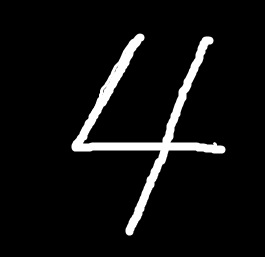

In [42]:
from PIL import Image

img = Image.open('data/4.png')
img

In [43]:
img.size

(265, 257)

In [44]:
import numpy as np

img_np = np.array(img)
img_np.shape

(257, 265, 3)

In [45]:
infer_transform = transforms.Compose(
    [
        transforms.ToTensor(),
        transforms.Grayscale(),
        transforms.Resize(32),
        transforms.Normalize((0.5,),(1.0,))  # 간이 정규화
        
    ]
)

img = infer_transform(img)
img.size()

torch.Size([1, 32, 32])

In [ ]:
img

tensor([[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         ...,
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]])

In [46]:
infer_transform(img_np)

tensor([[[-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         ...,
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000],
         [-0.5000, -0.5000, -0.5000,  ..., -0.5000, -0.5000, -0.5000]]])

In [ ]:
pred = model(img.to(device))
torch.max(pred,1)

torch.return_types.max(
values=tensor([1.], device='cuda:0', grad_fn=<MaxBackward0>),
indices=tensor([4], device='cuda:0'))

In [48]:
torch.max(pred,1)[1]

tensor([4], device='cuda:0')

In [52]:
torch.max(pred,1)[1].item()

4